In [1]:
import pandas as pd
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/RWF_fight//CDI_Based/Intensity/CSV/Gray.csv',index_col=0)
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.000000,0.028272,0.290819,0.256019,0.791606,0.695249,0.183270,0.165141,0.475022,0.355698,...,0.602157,0.269717,0.198892,0.784086,1.000000,0.092684,0.095424,0.336112,0.293151,0
1,0.032305,0.009882,0.355736,0.202318,0.687148,1.000000,0.064040,0.045861,0.152974,0.058529,...,0.000000,0.108064,0.084753,0.837081,0.992842,0.024197,0.002217,0.324064,0.099132,0
2,0.222071,0.008280,0.244439,0.775828,0.196861,0.114063,0.059441,0.056846,0.200074,0.248023,...,0.044241,0.000000,0.022368,0.387914,0.723925,0.296713,0.565373,0.931537,1.000000,0
3,1.000000,0.669419,0.545547,0.516516,0.478801,0.575175,0.750639,0.684233,0.618253,0.406521,...,0.754214,0.584710,0.522816,0.816022,0.526307,0.246382,0.488166,0.411119,0.000000,0
4,1.000000,0.228268,0.156742,0.169678,0.068515,0.048597,0.057358,0.019576,0.019028,0.071458,...,0.452841,0.396304,0.367146,0.311567,0.584736,0.673717,0.418001,0.331622,0.315606,0


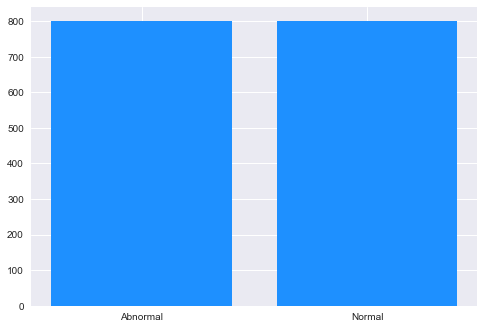

In [2]:

import warnings
warnings.filterwarnings("ignore")
 
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix
from sklearn import metrics
num_normal = np.sum(d['Class'] == 0)
num_abnormal = np.sum(d['Class'] == 1)
plt.bar(['Abnormal', 'Normal'], [num_abnormal, num_normal], color='dodgerblue')
plt.show()

In [3]:
# 提取负样本，并且按照8:2切成训练集和测试集
data = d
mask = (data['Class'] == 0)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)

X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)


X_fraud = data[~mask].drop(['Class'], axis=1)



In [8]:

# 设置Autoencoder的参数
# 隐藏层节点数分别为16，8，8，16
# epoch为50，batch size为32
input_dim = X_train.shape[1]
encoding_dim = 4
num_epoch = 700
batch_size = 64

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mae'])

# 模型保存为SofaSofa_model.h5，并开始训练模型
checkpointer = ModelCheckpoint(filepath="gray_ae.h5",
                               verbose=0,
                               save_best_only=True)
history = autoencoder.fit(X_train, X_train,
                          epochs=num_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1, 
                          callbacks=[checkpointer]).history



Epoch 1/700
10/10 [==============================] - 0s 19ms/step - loss: 0.2177 - mae: 0.3737 - val_loss: 0.2105 - val_mae: 0.3678
Epoch 2/700
10/10 [==============================] - 0s 7ms/step - loss: 0.2020 - mae: 0.3547 - val_loss: 0.1943 - val_mae: 0.3471
Epoch 3/700
10/10 [==============================] - 0s 7ms/step - loss: 0.1846 - mae: 0.3341 - val_loss: 0.1776 - val_mae: 0.3270
Epoch 4/700
10/10 [==============================] - 0s 7ms/step - loss: 0.1708 - mae: 0.3188 - val_loss: 0.1660 - val_mae: 0.3152
Epoch 5/700
10/10 [==============================] - 0s 9ms/step - loss: 0.1627 - mae: 0.3113 - val_loss: 0.1589 - val_mae: 0.3083
Epoch 6/700
10/10 [==============================] - 0s 11ms/step - loss: 0.1572 - mae: 0.3066 - val_loss: 0.1535 - val_mae: 0.3028
Epoch 7/700
10/10 [==============================] - 0s 7ms/step - loss: 0.1525 - mae: 0.3015 - val_loss: 0.1489 - val_mae: 0.2974
Epoch 8/700
10/10 [==============================] - 0s 8ms/step - loss: 0.1481 -

Epoch 125/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0448 - mae: 0.1641 - val_loss: 0.0460 - val_mae: 0.1668
Epoch 126/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0447 - mae: 0.1640 - val_loss: 0.0459 - val_mae: 0.1664
Epoch 127/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0446 - mae: 0.1636 - val_loss: 0.0458 - val_mae: 0.1663
Epoch 128/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0445 - mae: 0.1635 - val_loss: 0.0457 - val_mae: 0.1661
Epoch 129/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0444 - mae: 0.1632 - val_loss: 0.0456 - val_mae: 0.1658
Epoch 130/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0443 - mae: 0.1630 - val_loss: 0.0455 - val_mae: 0.1656
Epoch 131/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0442 - mae: 0.1626 - val_loss: 0.0454 - val_mae: 0.1654
Epoch 132/700
10/10 [==============================] - 0s 6ms/step - 

Epoch 248/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0403 - mae: 0.1540 - val_loss: 0.0419 - val_mae: 0.1585
Epoch 249/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0403 - mae: 0.1540 - val_loss: 0.0419 - val_mae: 0.1581
Epoch 250/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0403 - mae: 0.1541 - val_loss: 0.0419 - val_mae: 0.1579
Epoch 251/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0403 - mae: 0.1540 - val_loss: 0.0419 - val_mae: 0.1582
Epoch 252/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0403 - mae: 0.1539 - val_loss: 0.0419 - val_mae: 0.1585
Epoch 253/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0403 - mae: 0.1539 - val_loss: 0.0419 - val_mae: 0.1584
Epoch 254/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0403 - mae: 0.1539 - val_loss: 0.0419 - val_mae: 0.1580
Epoch 255/700
10/10 [==============================] - 0s 6ms/step - 

Epoch 371/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0399 - mae: 0.1530 - val_loss: 0.0415 - val_mae: 0.1573
Epoch 372/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0399 - mae: 0.1530 - val_loss: 0.0415 - val_mae: 0.1574
Epoch 373/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0399 - mae: 0.1530 - val_loss: 0.0415 - val_mae: 0.1577
Epoch 374/700
10/10 [==============================] - 0s 3ms/step - loss: 0.0399 - mae: 0.1530 - val_loss: 0.0415 - val_mae: 0.1577
Epoch 375/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0399 - mae: 0.1530 - val_loss: 0.0415 - val_mae: 0.1574
Epoch 376/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0399 - mae: 0.1529 - val_loss: 0.0415 - val_mae: 0.1575
Epoch 377/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0399 - mae: 0.1529 - val_loss: 0.0415 - val_mae: 0.1577
Epoch 378/700
10/10 [==============================] - 0s 4ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.0398 - mae: 0.1526 - val_loss: 0.0414 - val_mae: 0.1571
Epoch 494/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.1527 - val_loss: 0.0414 - val_mae: 0.1574
Epoch 495/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.1527 - val_loss: 0.0414 - val_mae: 0.1569
Epoch 496/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.1527 - val_loss: 0.0414 - val_mae: 0.1572
Epoch 497/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.1527 - val_loss: 0.0414 - val_mae: 0.1573
Epoch 498/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.1527 - val_loss: 0.0414 - val_mae: 0.1569
Epoch 499/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.1527 - val_loss: 0.0414 - val_mae: 0.1573
Epoch 500/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0398 -

Epoch 555/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.1526 - val_loss: 0.0414 - val_mae: 0.1570
Epoch 556/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.1526 - val_loss: 0.0414 - val_mae: 0.1575
Epoch 557/700
10/10 [==============================] - 0s 3ms/step - loss: 0.0398 - mae: 0.1527 - val_loss: 0.0414 - val_mae: 0.1569
Epoch 558/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.1526 - val_loss: 0.0414 - val_mae: 0.1572
Epoch 559/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.1526 - val_loss: 0.0414 - val_mae: 0.1570
Epoch 560/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.1526 - val_loss: 0.0414 - val_mae: 0.1571
Epoch 561/700
10/10 [==============================] - 0s 6ms/step - loss: 0.0397 - mae: 0.1526 - val_loss: 0.0413 - val_mae: 0.1568
Epoch 562/700
10/10 [==============================] - 0s 4ms/step - 

Epoch 678/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.1525 - val_loss: 0.0414 - val_mae: 0.1565
Epoch 679/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.1526 - val_loss: 0.0414 - val_mae: 0.1576
Epoch 680/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.1526 - val_loss: 0.0413 - val_mae: 0.1568
Epoch 681/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.1525 - val_loss: 0.0413 - val_mae: 0.1571
Epoch 682/700
10/10 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.1526 - val_loss: 0.0413 - val_mae: 0.1571
Epoch 683/700
10/10 [==============================] - 0s 5ms/step - loss: 0.0397 - mae: 0.1525 - val_loss: 0.0413 - val_mae: 0.1567
Epoch 684/700
10/10 [==============================] - 0s 7ms/step - loss: 0.0397 - mae: 0.1525 - val_loss: 0.0413 - val_mae: 0.1568
Epoch 685/700
10/10 [==============================] - 0s 4ms/step - 

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


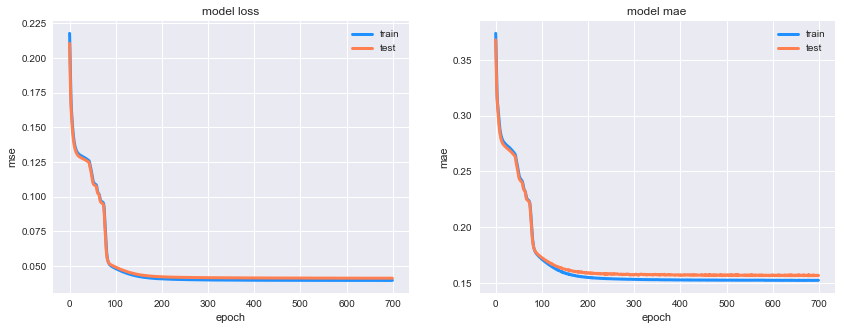

In [9]:
print(history.keys())

# 画出损失函数曲线
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(history['loss'], c='dodgerblue', lw=3)
plt.plot(history['val_loss'], c='coral', lw=3)
plt.title('model loss')
plt.ylabel('mse'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


plt.subplot(122)
plt.plot(history['mae'], c='dodgerblue', lw=3)
plt.plot(history['val_mae'], c='coral', lw=3)
plt.title('model mae')
plt.ylabel('mae'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [10]:
# 读取模型
#print(len(X_train[4]))
autoencoder = load_model('gray_ae.h5')
#pred=autoencoder.predict(X_test[0].reshape(1,29))
#print(pred)
#print(X_test[0].shape)
# 利用训练好的autoencoder重建测试集
pred_test = autoencoder.predict(X_test)
pred_fraud = autoencoder.predict(X_fraud)

# 计算还原误差MSE和MAE
mse_test = np.mean(np.power(X_test - pred_test, 2), axis=1)
mse_fraud = np.mean(np.power(X_fraud - pred_fraud, 2), axis=1)
mae_test = np.mean(np.abs(X_test - pred_test), axis=1)
mae_fraud = np.mean(np.abs(X_fraud - pred_fraud), axis=1)
mse_df = pd.DataFrame()
mse_df['Class'] = [0] * len(mse_test) + [1] * len(mse_fraud)
mse_df['MSE'] = np.hstack([mse_test, mse_fraud])
mse_df['MAE'] = np.hstack([mae_test, mae_fraud])
mse_df = mse_df.sample(frac=1).reset_index(drop=True)


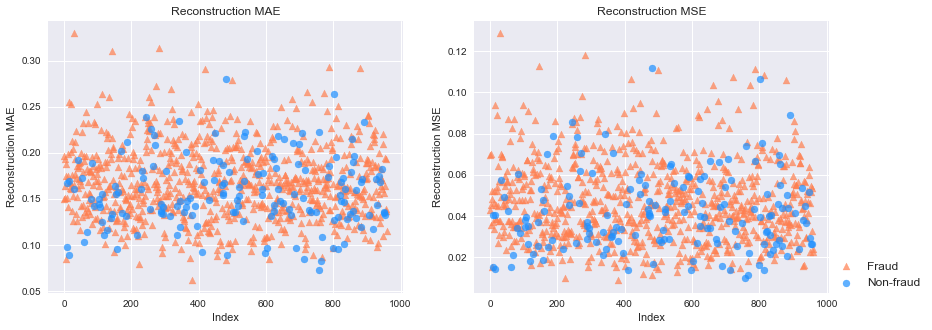

In [11]:
# 分别画出测试集中正样本和负样本的还原误差MAE和MSE
markers = ['o', '^']
markers = ['o', '^']
colors = ['dodgerblue', 'coral']
labels = ['Non-fraud', 'Fraud']

plt.figure(figsize=(14, 5))
plt.subplot(121)
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp.index, 
                temp['MAE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.title('Reconstruction MAE')
plt.ylabel('Reconstruction MAE'); plt.xlabel('Index')
plt.subplot(122)
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp.index, 
                temp['MSE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.legend(loc=[1, 0], fontsize=12); plt.title('Reconstruction MSE')
plt.ylabel('Reconstruction MSE'); plt.xlabel('Index')
plt.show()

In [12]:
test_df = pd.DataFrame({'Test MSE': mse_test})
anormaly_df = pd.DataFrame({"Anormaly MSE": mse_fraud})
sum_test=test_df.describe()
sum_test['Anormaly MSE']=anormaly_df.describe()['Anormaly MSE']
display(sum_test)
print(['MAE','MSE'])

,Test MSE,Anormaly MSE
count,160.000000,800.000000
mean,0.041222,0.047268
std,0.018512,0.019476
min,0.009960,0.008596
25%,0.027598,0.032755
50%,0.039433,0.044877
75%,0.052419,0.058917
max,0.111650,0.128728


['MAE', 'MSE']


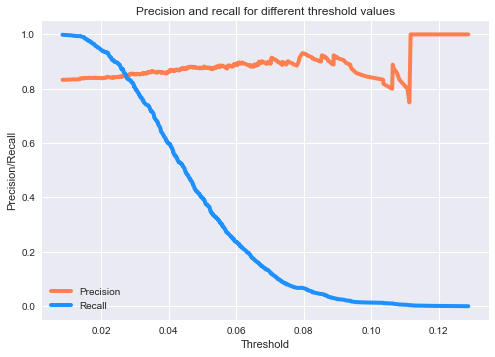

In [13]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(mse_df['Class'], mse_df['MSE'])

plt.plot(threshold_rt, precision_rt[1:], c='coral',label="Precision",linewidth=4)
plt.plot(threshold_rt, recall_rt[1:],c='dodgerblue', label="Recall",linewidth=4)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

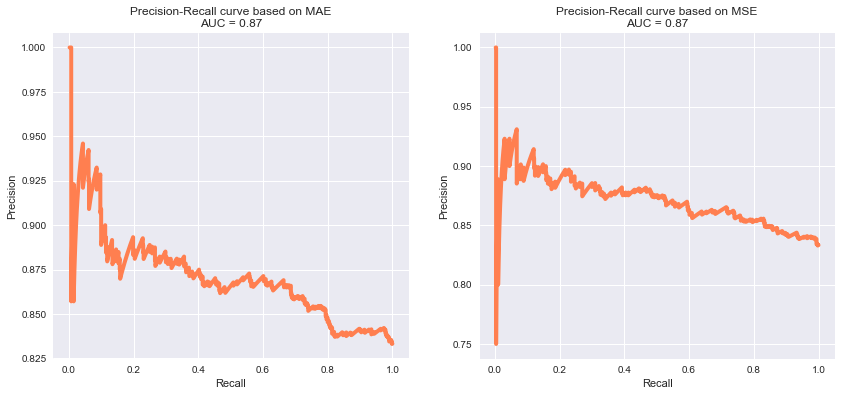

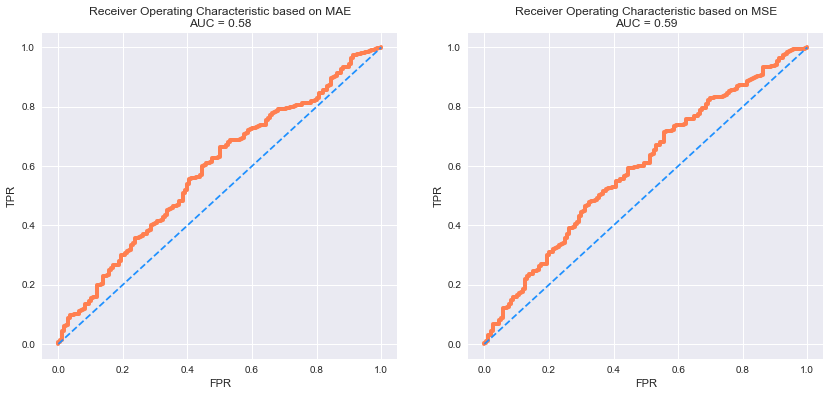

In [14]:
# 画出Precision-Recall曲线
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['MAE', 'MSE']):
    plt.subplot(1, 2, i+1)
    precision, recall, _ = precision_recall_curve(mse_df['Class'], mse_df[metric])
    pr_auc = auc(recall, precision)
    plt.title('Precision-Recall curve based on %s\nAUC = %0.2f'%(metric, pr_auc))
    plt.plot(recall[:-2], precision[:-2], c='coral', lw=4)
    plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()

# 画出ROC曲线
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['MAE', 'MSE']):
    plt.subplot(1, 2, i+1)
    fpr, tpr, _ = roc_curve(mse_df['Class'], mse_df[metric])
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic based on %s\nAUC = %0.2f'%(metric, roc_auc))
    plt.plot(fpr, tpr, c='coral', lw=4)
    plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
    plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

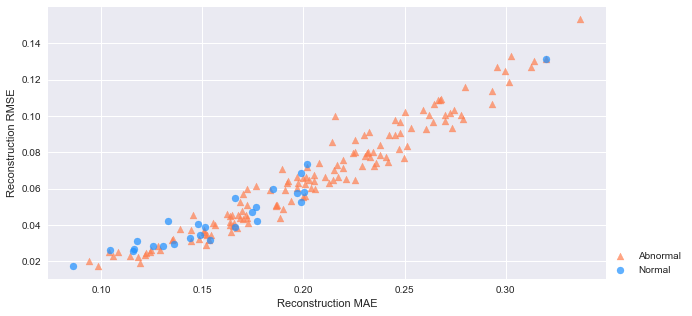

In [22]:
# 画出MSE、MAE散点图
markers = ['o', '^']
colors = ['dodgerblue', 'coral']
labels = ['Normal', 'Abnormal']

plt.figure(figsize=(10, 5))
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp['MAE'], 
                temp['MSE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.legend(loc=[1, 0])
plt.ylabel('Reconstruction RMSE'); plt.xlabel('Reconstruction MAE')
plt.show()

0.7976190476190477


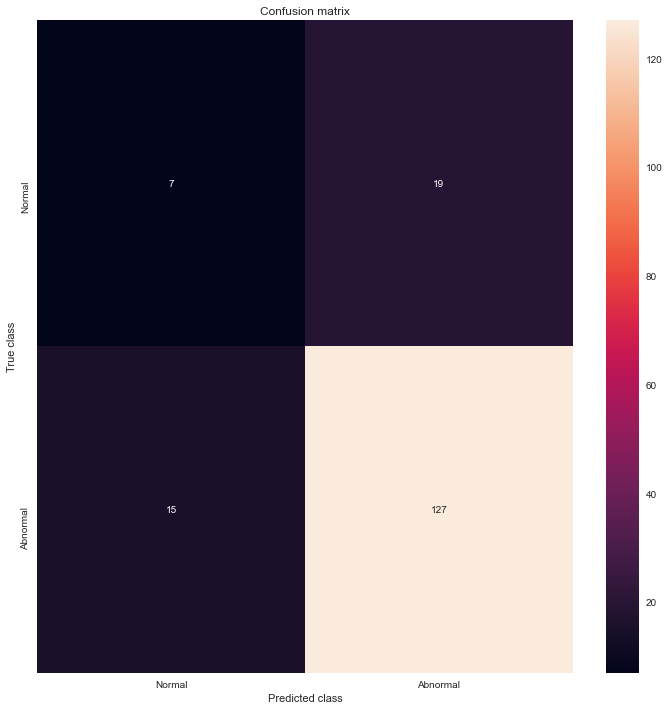

In [23]:
LABELS = ["Normal", "Abnormal"]
threshold_fixed = 0.031
pred_y = [1 if e > threshold_fixed else 0 for e in mse_df['MSE'].values]
conf_matrix = confusion_matrix(mse_df['Class'], pred_y)
accuracy=metrics.accuracy_score(mse_df['Class'],pred_y)
print(accuracy)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()